# Modelo predictivo de Regresión Logistica

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entren el 3 modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el m delo.
5. Entrenar el modelo configurando los diferentes hiperpar metros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-s ore, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos..

In [1]:
# Importación de la biblioteca pandas para la manipulación y análisis de datos
import pandas as pd # type: ignore
# Importación de la biblioteca numpy para operaciones matemáticas y manipulación de matrices
import numpy as np # type: ignore
# Importación de la biblioteca seaborn para visualización de datos estadísticos
import seaborn as sns # type: ignore
# Importación de la biblioteca matplotlib.pyplot para trazar gráficos
import matplotlib.pyplot as plt # type: ignore
# Importación de métricas de evaluación de modelos de aprendizaje automático de scikit-learn
from sklearn import metrics # type: ignore
# Importación de la función train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split # type: ignore
# Importación de la clase LogisticRegression de scikit-learn para construir modelos de regresión logística
from sklearn.linear_model import LogisticRegression # type: ignore
# Importación de funciones adicionales de evaluación de modelos de scikit-learn
from sklearn.metrics import classification_report, confusion_matrix # type: ignore


# Punto 1. 
Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [2]:
# Lectura de datos desde un archivo CSV utilizando pandas
Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [3]:
# Mostrar las primeras 50 filas de los datos
Datos.head(50)


,edad,sexo,tip_dolorPecho,presion_arterial_reposo,colesterol_serico,glucemia_ayunas,electrocardiograma_reposo,frecuencia_cardiaca_maxima,angina_inducida_ejercicio,depresion_st_ejercicio,pendiente_st_ejercicio,num_vasos_fluoroscopia,talasemia,condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
# Obtener un resumen estadístico de los datos (count, mean, std,min, max, quartiles 1 2 3)
Datos.describe()


,edad,sexo,tip_dolorPecho,presion_arterial_reposo,colesterol_serico,glucemia_ayunas,electrocardiograma_reposo,frecuencia_cardiaca_maxima,angina_inducida_ejercicio,depresion_st_ejercicio,pendiente_st_ejercicio,num_vasos_fluoroscopia,talasemia,condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


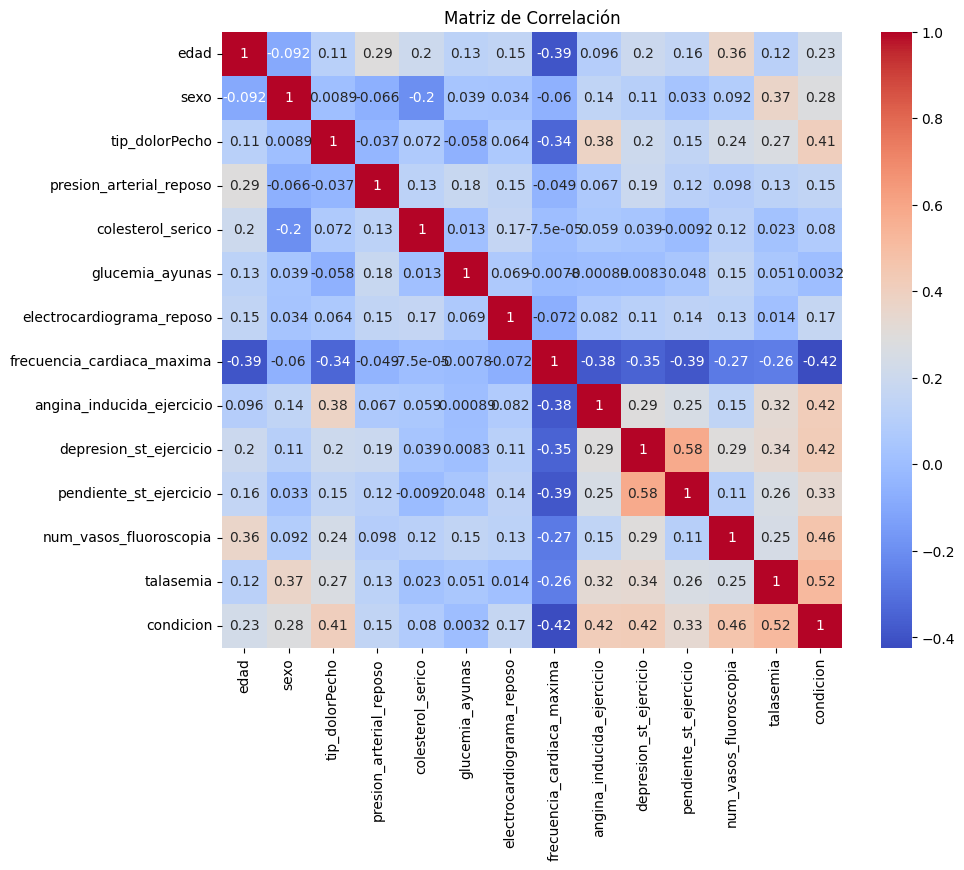

In [5]:
# Calcula la matriz de correlación
correlacion = Datos.corr()

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 8))

# Visualiza la matriz de correlación utilizando un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

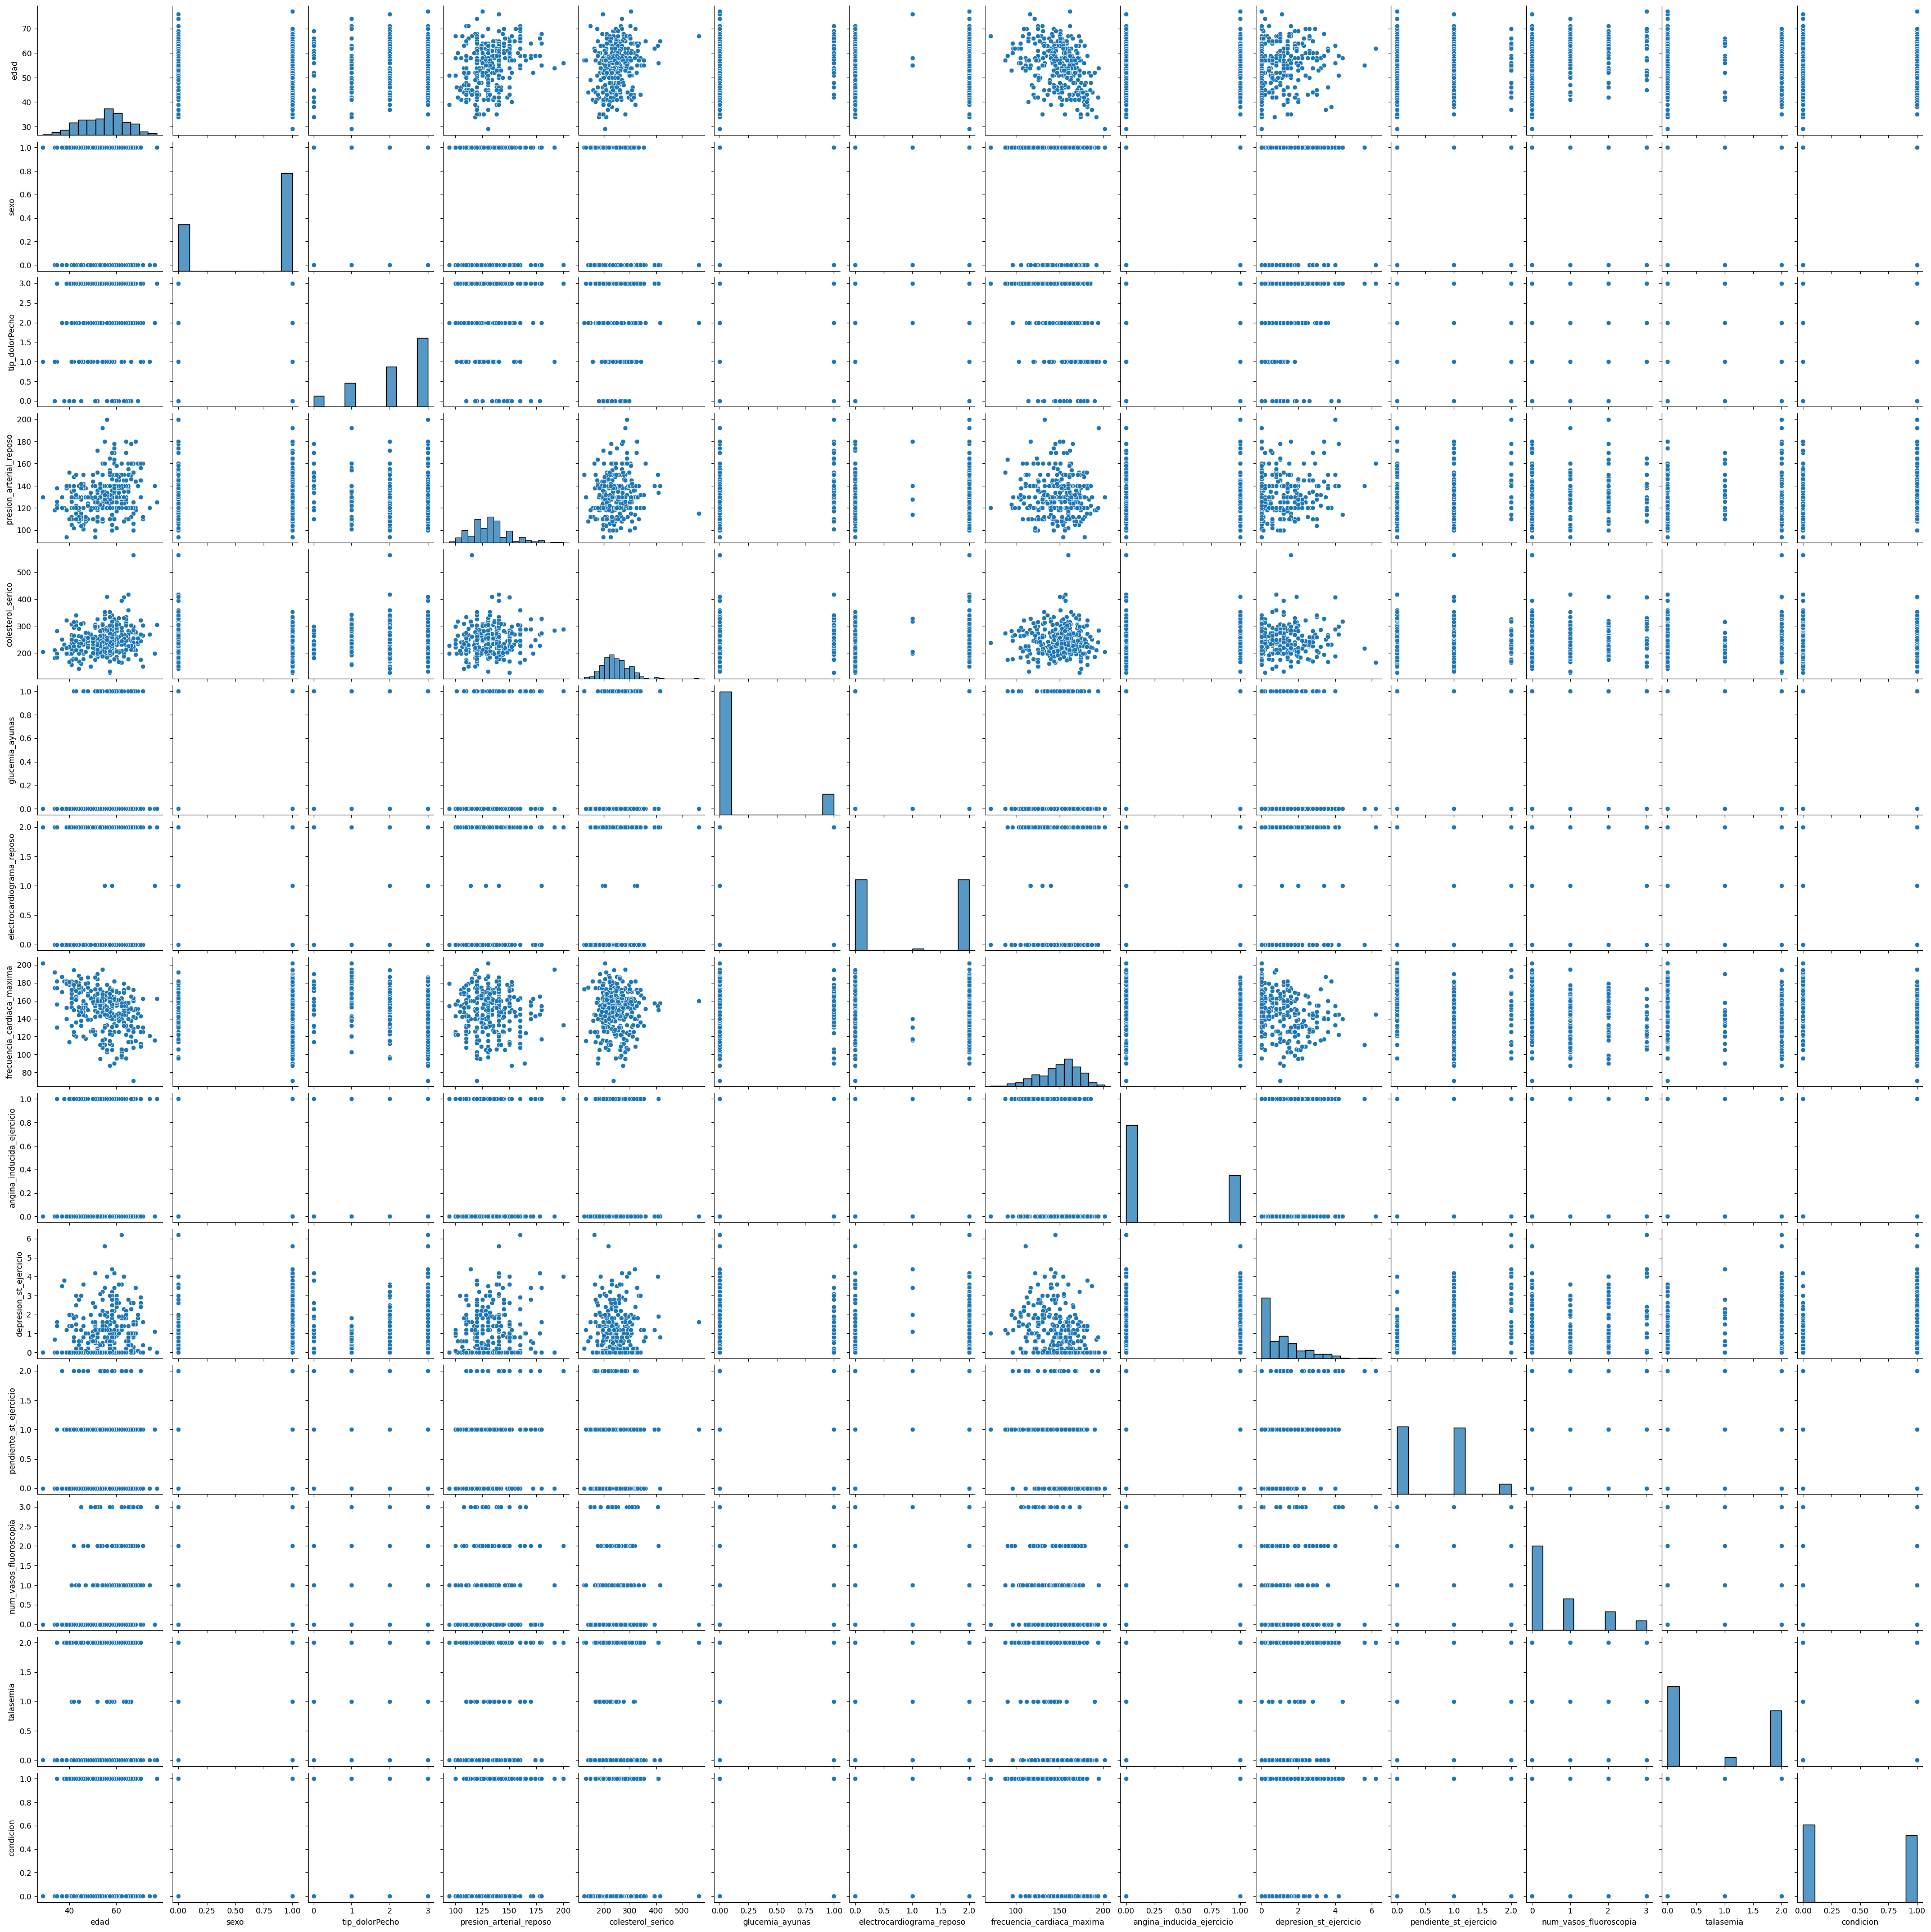

In [6]:
# Gráficos de dispersión para pares de variables
sns.pairplot(Datos)
plt.show()

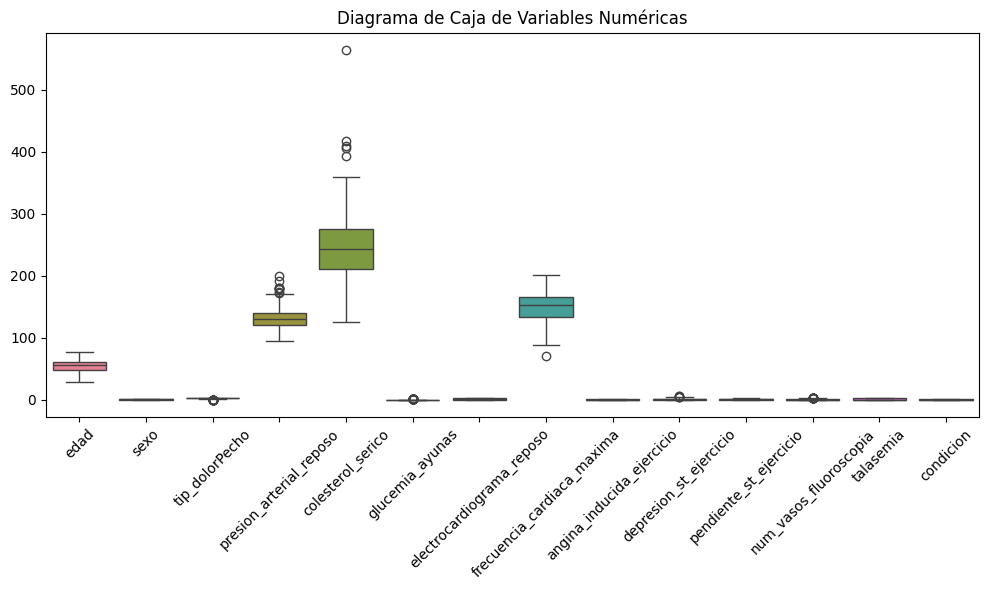

In [7]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 6))

# Diagramas de caja para variables numéricas
sns.boxplot(data=Datos)
plt.title('Diagrama de Caja de Variables Numéricas')
plt.xticks(rotation=45) #rotar 45 grados los nombres del eje x
# Ajusta el espaciado entre los elementos en el eje y
plt.tight_layout()

plt.show()

# Punto 2.
Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


In [8]:
# Verificar si hay valores faltantes
valores_faltantes = Datos.isnull().sum()
print(valores_faltantes)

edad                          0
sexo                          0
tip_dolorPecho                0
presion_arterial_reposo       0
colesterol_serico             0
glucemia_ayunas               0
electrocardiograma_reposo     0
frecuencia_cardiaca_maxima    0
angina_inducida_ejercicio     0
depresion_st_ejercicio        0
pendiente_st_ejercicio        0
num_vasos_fluoroscopia        0
talasemia                     0
condicion                     0
dtype: int64


In [9]:
#conteo de datos atipicos

# Calcular el rango intercuartílico (IQR)
Q1 = Datos.quantile(0.25)
Q3 = Datos.quantile(0.75)
IQR = Q3 - Q1

# Identificar datos atípicos para cada columna
datos_atipicos = ((Datos < (Q1 - 1.5 * IQR)) | (Datos > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de datos atípicos por columna
print("Datos atípicos por columna:")
print(datos_atipicos)

Datos atípicos por columna:
edad                           0
sexo                           0
tip_dolorPecho                23
presion_arterial_reposo        9
colesterol_serico              5
glucemia_ayunas               43
electrocardiograma_reposo      0
frecuencia_cardiaca_maxima     1
angina_inducida_ejercicio      0
depresion_st_ejercicio         5
pendiente_st_ejercicio         0
num_vasos_fluoroscopia        20
talasemia                      0
condicion                      0
dtype: int64


In [10]:
# Calcular el rango intercuartílico (IQR)
Q1 = Datos.quantile(0.25)  # Primer cuartil
Q3 = Datos.quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Definir el umbral para identificar valores atípicos
umbral = 1.7

# Identificar datos atípicos para cada columna
datos_atipicos = ((Datos < (Q1 - umbral * IQR)) | (Datos > (Q3 + umbral * IQR)))
datos_atipicosmostrar = ((Datos < (Q1 - umbral * IQR)) | (Datos > (Q3 + umbral * IQR))).sum()

# Eliminar filas que contienen valores atípicos en al menos una columna
Datos_limpios = Datos[~datos_atipicos.any(axis=1)]

# Mostrar la forma del DataFrame después de eliminar datos atípicos
print("Forma del DataFrame después de eliminar datos atípicos:", Datos_limpios.shape)

# Mostrar el número de valores atípicos que quedaron después de la eliminación
valores_atipicos_quedan = datos_atipicos.sum().sum()
print("Número de valores atípicos que quedan después de la eliminación:", valores_atipicos_quedan)

print("Datos atípicos por columna:")
print(datos_atipicosmostrar)

Forma del DataFrame después de eliminar datos atípicos: (213, 14)
Número de valores atípicos que quedan después de la eliminación: 102
Datos atípicos por columna:
edad                           0
sexo                           0
tip_dolorPecho                23
presion_arterial_reposo        7
colesterol_serico              5
glucemia_ayunas               43
electrocardiograma_reposo      0
frecuencia_cardiaca_maxima     1
angina_inducida_ejercicio      0
depresion_st_ejercicio         3
pendiente_st_ejercicio         0
num_vasos_fluoroscopia        20
talasemia                      0
condicion                      0
dtype: int64


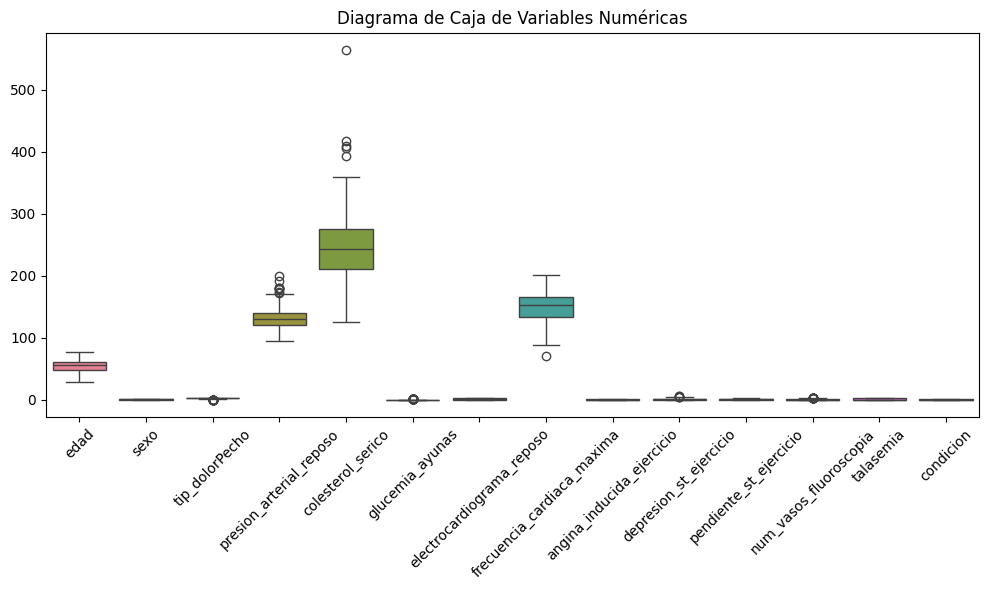

In [11]:
plt.figure(figsize=(10, 6))

# Diagramas de caja para variables numéricas
sns.boxplot(data=Datos)
plt.title('Diagrama de Caja de Variables Numéricas')
plt.xticks(rotation=45) #rotar 45 grados los nombres del eje x
# Ajusta el espaciado entre los elementos en el eje y
plt.tight_layout()

plt.show()

# Punto 3.
Seleccionar las características más relevantes para entren el 3 modelo utilizando selección de características.


In [12]:
# Recuento de los diferentes valores presentes en la columna 'condicion' del DataFrame 'Datos'
Datos['condicion'].value_counts()

condicion
0    160
1    137
Name: count, dtype: int64

In [13]:

# Mostrar los primeros 20 registros de la columna 'condicion' del DataFrame 'Datos'
Datos[['condicion']].head(20)

,condicion
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


# Punto 4.
Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [14]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = Datos.drop(columns=['condicion'])  # Características (todas las columnas excepto 'condicion')
y = Datos['condicion']  # Etiquetas (la columna 'condicion')

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento, 20% para prueba)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state= 0)
# Mostrar las formas de los conjuntos de entrenamiento y prueba
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma del conjunto de entrenamiento (y_train):", y_train.shape)
print("Forma del conjuto de prueba (y_test):", y_test.shape)

Forma del conjunto de entrenamiento (X_train): (222, 13)
Forma del conjunto de prueba (X_test): (75, 13)
Forma del conjunto de entrenamiento (y_train): (222,)
Forma del conjuto de prueba (y_test): (75,)


# Punto 5.
Entrenar el modelo configurando los diferentes hiperpar metros.


In [15]:
# Construir el modelo de regresión logística

# Inicializar el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")

# Entrenar el modelo utilizando los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Crea el modelo de predicción
Prediccion = modelo_regresion.predict(X_test)

In [16]:
print (y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condicion, Length: 75, dtype: int64


In [17]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


# Punto 6.
 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-s ore, etc.


In [18]:
# Desempeño del modelo de regresión

print(classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



# Punto 7.
Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


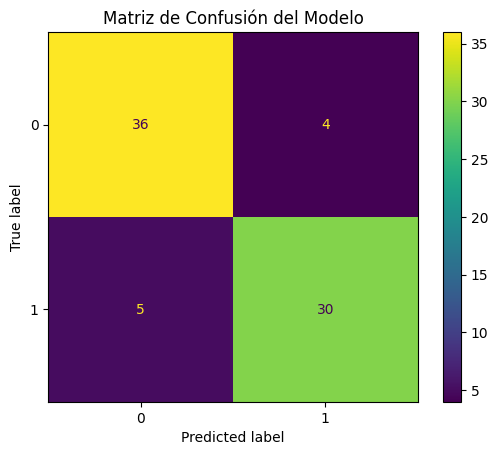

In [19]:

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, Prediccion)

# Crear la visualización de la matriz de confusión
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot()
plt.title('Matriz de Confusión del Modelo')
plt.show()

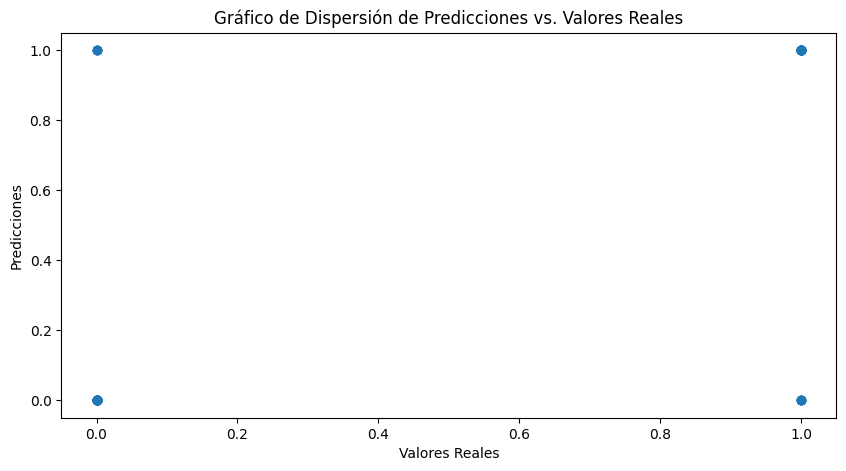

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, Prediccion)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión de Predicciones vs. Valores Reales')
plt.show()

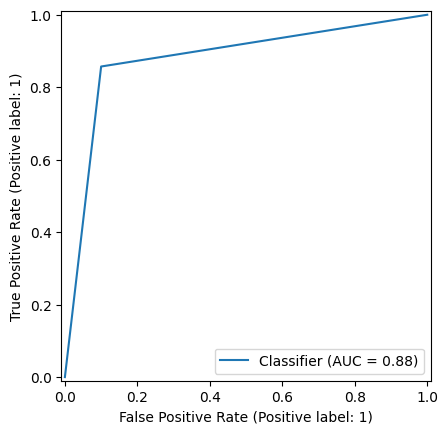

In [21]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay # type: ignore
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()

# Punto 8.
Interpretar, analizar y documentar los resultados obtenidos..

## Interpretación y Análisis de Datos:



* Para la interpretación de los datos, comenzamos cargando el conjunto de datos que contiene las variables relacionadas con la presencia o ausencia de enfermedades cardíacas en los individuos.
* En segundo lugar, realizamos la exploración de datos (EDA), que incluye varias etapas. Inicialmente, cargamos y leemos el dataset, y antes de eso, llevamos a cabo una traducción de los datos al español.
* En tercer lugar, llevamos a cabo la exploración univariante, bivariante y multivariante mediante el uso de diagramas de dispersión y correlación.
* En cuarto lugar, detectamos todos los valores atípicos utilizando diagramas de caja y los eliminamos mediante el rango intercuartílico.
* Después de identificar los datos atípicos o nulos, avanzamos a la siguiente fase.

## Pre-procesamiento de Datos:

* Se limpian los datos, asegurando que los valores nulos sean completados mediante la media o el interpolado, de modo que se imputen los datos faltantes.
* Además, se eliminan los datos atípicos, seguido de una verificación de los valores para asegurar la integridad de los mismos.

## Selección de Características Relevantes:



* Seleccionamos la caracteristica mas relevante, con el fin de poder entrenar el modelo de datos, siendo esta variable la que indica la condicion del paciente, si tiene o no tiene una enfermedad cardiaca.

## Entrenamiento del Modelo:

* Usando la librería scikit-learn, podemos generar y construir un modelo de regresión logística. Ajustamos los datos al algoritmo para poder predecir el resultado, lo que nos permite clasificar o etiquetar nuestros resultados en una sola categoría.

* Posteriormente, se realizan predicciones utilizando dicho modelo y se evalúa su desempeño mediante la clasificación de los datos de prueba.

## Evaluación del Desempeño del Modelo:

Al evaluar el modelo de clasificación, se utilizó la función `classification_report(y_test,Prediccion)` para medir la precisión del clasificador, generando la siguiente tabla, que permite observar la precisión, recall, f1-score y support:

- Podemos observar que, para la clase cero (individuos sin enfermedades cardíacas), se logra una precisión del 88%, un recall (tasa de verdaderos positivos) del 90%, y finalmente un F1-score del 89%. 

- Para la clase 1 (individuos con enfermedades cardíacas), se alcanza una precisión del 88%, un recall del 86%, y un F1-score del 87%.

- Se concluye que el modelo tiene un buen rendimiento, ya que los valores en general dan 88/100, por ende podemos tener una buena confiabilidad en el modelo.

## Visualización de Resultados:

* Los resultados se presentan mediante matrices de confusión, curvas de precisión y gráficos de dispersión frente a los valores reales, resaltando el eficaz desempeño del modelo en la clasificación binaria de la presencia y ausencia de enfermedades cardíacas.